In [1]:
from quadcoil import quadcoil
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax
from jax import block_until_ready
import time
import matplotlib.pyplot as plt
import plotly

In [ ]:
from quadcoil.quantity.current import _K
# pass in dofs as dict like {'phi': (the dofs array)}

In [2]:
from simsopt.geo import SurfaceRZFourier
plasma_surface = SurfaceRZFourier.from_wout('wout_li383_1.4m.nc')
net_poloidal_current_amperes = 11884578.094260072

In [ ]:
# from simsopt import load
# winding_surface, plasma_surface = load('surfaces.json')
# net_poloidal_current_amperes = 11884578.094260072
# mpol = 4
# ntor = 4
# jax.config.update('jax_enable_x64', False)

In [ ]:
# Then, test with REGCOIL, given winding surface.
print('Testing REGCOIL, with known winding surface')
regcoil1_out_dict, regcoil1_qp, regcoil1_dofs, status = quadcoil(
    nfp=plasma_surface.nfp,
    stellsym=plasma_surface.stellsym,
    mpol=plasma_surface.mpol,
    ntor=plasma_surface.ntor,
    plasma_dofs=plasma_surface.get_dofs(),
    plasma_mpol=plasma_surface.mpol,
    plasma_ntor=plasma_surface.ntor,
    net_poloidal_current_amperes=net_poloidal_current_amperes,
    net_toroidal_current_amperes=0.,
    plasma_coil_distance=np.float64(0.32575916842151176),
    # winding_dofs=winding_surface.get_dofs(),
    # winding_mpol=winding_surface.mpol,
    # winding_ntor=winding_surface.ntor,
    # winding_quadpoints_phi=winding_surface.quadpoints_phi,
    # winding_quadpoints_theta=winding_surface.quadpoints_theta,
    objective_name=('f_B', 'f_K'),
    objective_weight=np.array([1., 0.01]),
    objective_unit=(1., 1.),
    metric_name=('f_B', 'f_K'),
    verbose=4
)


Testing REGCOIL, with known winding surface
_K Traced<ShapedArray(float64[96,34,3])>with<DynamicJaxprTrace> *****************
_K Traced<ShapedArray(float64[32,34,3])>with<DynamicJaxprTrace> *****************
_K Traced<ShapedArray(float64[96,34,3])>with<DynamicJaxprTrace> *****************
_K Traced<ShapedArray(float64[32,34,3])>with<DynamicJaxprTrace> *****************
Plasma-coil distance (m): 0.32575916842151176
Running QUADCOIL in verbose mode 

----- Input summary ----- 
Evaluation phi quadpoint num: 32
Evaluation theta quadpoint num: 34
Plasma phi quadpoint num: 32
Plasma theta quadpoint num: 34
Winding phi quadpoint num: 96
Winding theta quadpoint num: 34
Net poloidal current (A): 11884578.094260072
Net toroidal current (A): 0.0
Constraint names: ()
Constraint types: ()
Constraint units: ()
Constraint values: []
Objective names: ('f_B', 'f_K')
Objective units: (Array(1., dtype=float64), Array(1., dtype=float64))
Objective weights: [1.   0.01]
Numerical parameters:
    c_init: 1.0

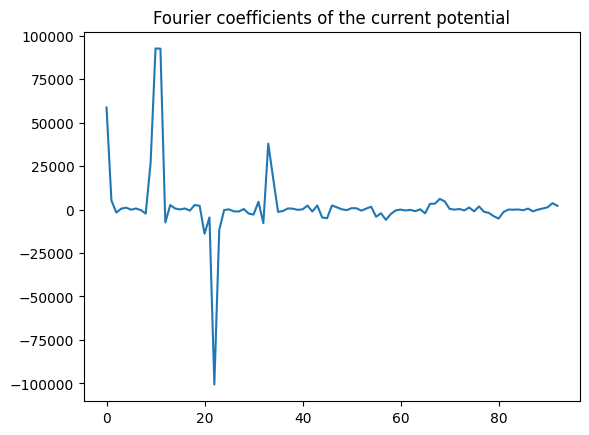

In [4]:
regcoil1_phi_mn = regcoil1_dofs['phi']
plt.title('Fourier coefficients of the current potential')
plt.plot(regcoil1_phi_mn, label='REGCOIL sln (from QUADCOIL surfaces.json)')

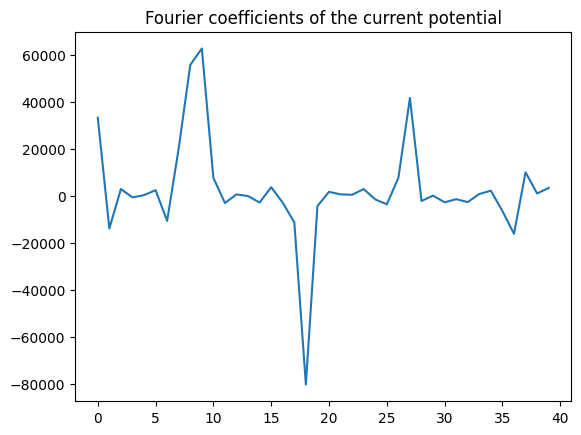

In [ ]:
# W/ surface.json 
regcoil1_phi_mn = regcoil1_dofs['phi']
plt.title('Fourier coefficients of the current potential')
plt.plot(regcoil1_phi_mn, label='REGCOIL sln (from QUADCOIL surfaces.json)')

In [5]:
import struct
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import netCDF4
thincurr_python_path =  '/home/sseethalla25/OpenFUSIONToolkit/install_release'
if thincurr_python_path is not None:
    sys.path.append(os.path.join(thincurr_python_path,'python'))
from OpenFUSIONToolkit import OFT_env
from OpenFUSIONToolkit.ThinCurr import ThinCurr
from OpenFUSIONToolkit.ThinCurr.meshing import build_regcoil_grid, ThinCurr_periodic_toroid
myOFT = OFT_env(nthreads=4)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          f6d11ac
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    4
Fortran input file    = /tmp/oft_185097/oftpyin
XML input file        = none
Integer Precisions    =    4   8
Float Precisions      =    4   8  10
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------



In [71]:
# pass in simsopt object for plasma and winding from quadcoil
try:
    from simsopt.geo import SurfaceRZFourier
except ImportError:
    print('Can not import SIMSOPT')
    raise
# Create coil mesh
plasma_grid = plasma_surface.gamma()

winding_surface = regcoil1_qp.eval_surface.to_simsopt()
winding_grid = winding_surface.gamma()
# winding_grid = np.concatenate((winding_grid, winding_grid[:, :1, :]), axis=1)
print(np.shape(winding_grid), np.shape(plasma_grid))

nphi = len(winding_surface.quadpoints_phi)
ntheta = len(winding_surface.quadpoints_theta)
winding_grid = ThinCurr_periodic_toroid(winding_grid,winding_surface.nfp,ntheta,nphi)
nphi = len(plasma_surface.quadpoints_phi)
ntheta = len(plasma_surface.quadpoints_theta)
plasma_grid = ThinCurr_periodic_toroid(plasma_grid,1,ntheta,nphi)

(32, 34, 3) (61, 62, 3)


In [58]:
winding_grid = winding_surface.gamma()
np.shape(winding_grid[0])
winding_grid[:,-2,:]-winding_grid[:,-1,:]

array([[-4.18923347e-02,  0.00000000e+00, -1.53040802e-01],
       [-4.70510645e-02, -3.08388969e-03, -1.46706224e-01],
       [-5.12228831e-02, -6.74362049e-03, -1.41394687e-01],
       [-5.19577865e-02, -1.03350463e-02, -1.38347208e-01],
       [-4.85478569e-02, -1.30083590e-02, -1.36510839e-01],
       [-4.27752813e-02, -1.45202514e-02, -1.34289454e-01],
       [-3.74543406e-02, -1.55140958e-02, -1.31721931e-01],
       [-3.40299343e-02, -1.67817065e-02, -1.30792187e-01],
       [-3.14498222e-02, -1.81575633e-02, -1.33372329e-01],
       [-2.74147268e-02, -1.83179348e-02, -1.38688849e-01],
       [-2.09185945e-02, -1.60514021e-02, -1.42915948e-01],
       [-1.37492640e-02, -1.20577809e-02, -1.41745413e-01],
       [-9.49483022e-03, -9.49483022e-03, -1.34033531e-01],
       [-1.08055945e-02, -1.23214191e-02, -1.23367267e-01],
       [-1.71972061e-02, -2.24118353e-02, -1.15893406e-01],
       [-2.51957552e-02, -3.77081124e-02, -1.15860590e-01],
       [-3.06256843e-02, -5.30452413e-02

In [13]:
# todo: pass in simsopt object for plasma and winding
def build_quadcoil_json(filename, field_suffix, full_torus=False):
    r'''! Build a uniform grid from a JSON surfaces file

    @param field_suffix Suffix for netCDF fields (eg. "plasma" or "coil")
    @param ntheta Number of points in the \f$ \theta \f$ (poloidal) direction
    @param nphi Number of points (per field period) in the \f$ \phi \f$ (toroidal) direction
    @param full_torus Construct grid for the full torus (default: one field period)
    @result `rgrid` Structed phi-theta grid of points [nphi,ntheta,3], `nfp` Number of field periods
    '''
    try:
        from simsopt import load
    except ImportError:
        print('Can not import SIMSOPT')
        raise
    coil_surface, plasma_surface = load(filename)
    # print(coil_surface.mpol, coil_surface.ntor)

    nfp = 3
    # print(grd.shape)
    # coil_mns, coil_mnc = coil_surface.fourier_transform_scalar(np.ones((nphi, ntheta)), mpol=mpol, ntor=ntor)
    # plasma_mns, plasma_mnc = plasma_surface.fourier_transform_scalar(np.ones((32, ntheta)), mpol=mpol, ntor=ntor)
    if field_suffix == 'plasma':
        nphi = len(plasma_surface.quadpoints_phi)
        ntheta = len(plasma_surface.quadpoints_theta)
        rmnc = plasma_surface.rc
        zmns = plasma_surface.zs
        xm = plasma_surface.m
        xn = plasma_surface.n
        nfp = nfp
        print(nphi, nfp)
        if full_torus:
            nphi *= nfp
            nfp = 1
            print(nphi, nfp)
        ntor = plasma_surface.ntor # simsopt m&n don't include inactive mode pairs, have to recalculate all possible pairs
        mpol = plasma_surface.mpol
        all_m, all_n = np.meshgrid(np.arange(mpol+1), np.arange(-ntor, ntor+1), indexing='ij')
        xm = all_m
        xn = all_n
    if field_suffix == 'coil':
        nphi = len(coil_surface.quadpoints_phi)
        ntheta = len(coil_surface.quadpoints_theta)
        rmnc = coil_surface.rc
        zmns = coil_surface.zs
        xm = coil_surface.m
        xn = coil_surface.n
        nfp = nfp
        if full_torus:
            nphi *= nfp
            nfp = 1
        ntor = coil_surface.ntor # simsopt m&n don't include inactive mode pairs, have to recalculate all possible pairs
        mpol = coil_surface.mpol
        all_m, all_n = np.meshgrid(np.arange(mpol+1), np.arange(-ntor, ntor+1), indexing='ij')
        xm = all_m
        xn = all_n
    # print(xm)
    # print(xn)

    # print(xm)
    # print(xn)
    # print(rmnc)
    # todo: look at simsopt.geo.surface
    theta_span = np.linspace(0.0,2.0*np.pi,ntheta,endpoint=False)
    zeta_span = np.linspace(0.0,2.0*np.pi/nfp,nphi,endpoint=(nfp>1))
    rgrid = np.zeros((zeta_span.shape[0],theta_span.shape[0],3))
    # print(np.shape(rmnc), np.shape(xm), np.shape(xn))
    for j in range(zeta_span.shape[0]):
        for i in range(theta_span.shape[0]):
            r = np.sum(rmnc*np.cos(xm*theta_span[i] - xn*zeta_span[j]))
            z = np.sum(zmns*np.sin(xm*theta_span[i] - xn*zeta_span[j]))
            rgrid[j,i,:] = [r*np.cos(zeta_span[j]), r*np.sin(zeta_span[j]), z]
    return rgrid, nfp

# nphi = len(winding_surface.quadpoints_phi)
# ntheta = len(winding_surface.quadpoints_theta)
# Create coil mesh

coil_grid, nfp = build_quadcoil_json('surfaces.json','coil', full_torus=False)
print(np.shape(coil_grid))
coil_grid = ThinCurr_periodic_toroid(coil_grid,nfp,ntheta,nphi)
# Create plasma mesh
plasma_grid, _ = build_quadcoil_json('surfaces.json','plasma', full_torus=True)
print(np.shape(plasma_grid))
plasma_grid = ThinCurr_periodic_toroid(plasma_grid,1,ntheta,nphi)

(96, 32, 3)
32 3
96 1
(96, 32, 3)


In [ ]:
# Import grid from regcoil file (not ideal)
# nphi = 96
# ntheta = 32
# coil_grid, nfp = build_regcoil_grid('regcoil_out.li383.nc','coil',ntheta,nphi,full_torus=False)
# print(np.shape(coil_grid))
# coil_grid = ThinCurr_periodic_toroid(coil_grid,nfp,ntheta,nphi)
# # Create plasma mesh
# plasma_grid, _ = build_regcoil_grid('regcoil_out.li383.nc','plasma',ntheta,nphi,full_torus=False)
# print(np.shape(plasma_grid))
# plasma_grid = ThinCurr_periodic_toroid(plasma_grid,nfp,ntheta,nphi)

(96, 32, 3)
(96, 32, 3)



Saving mesh: thincurr_plasma.h5

Saving mesh: thincurr_coil.h5


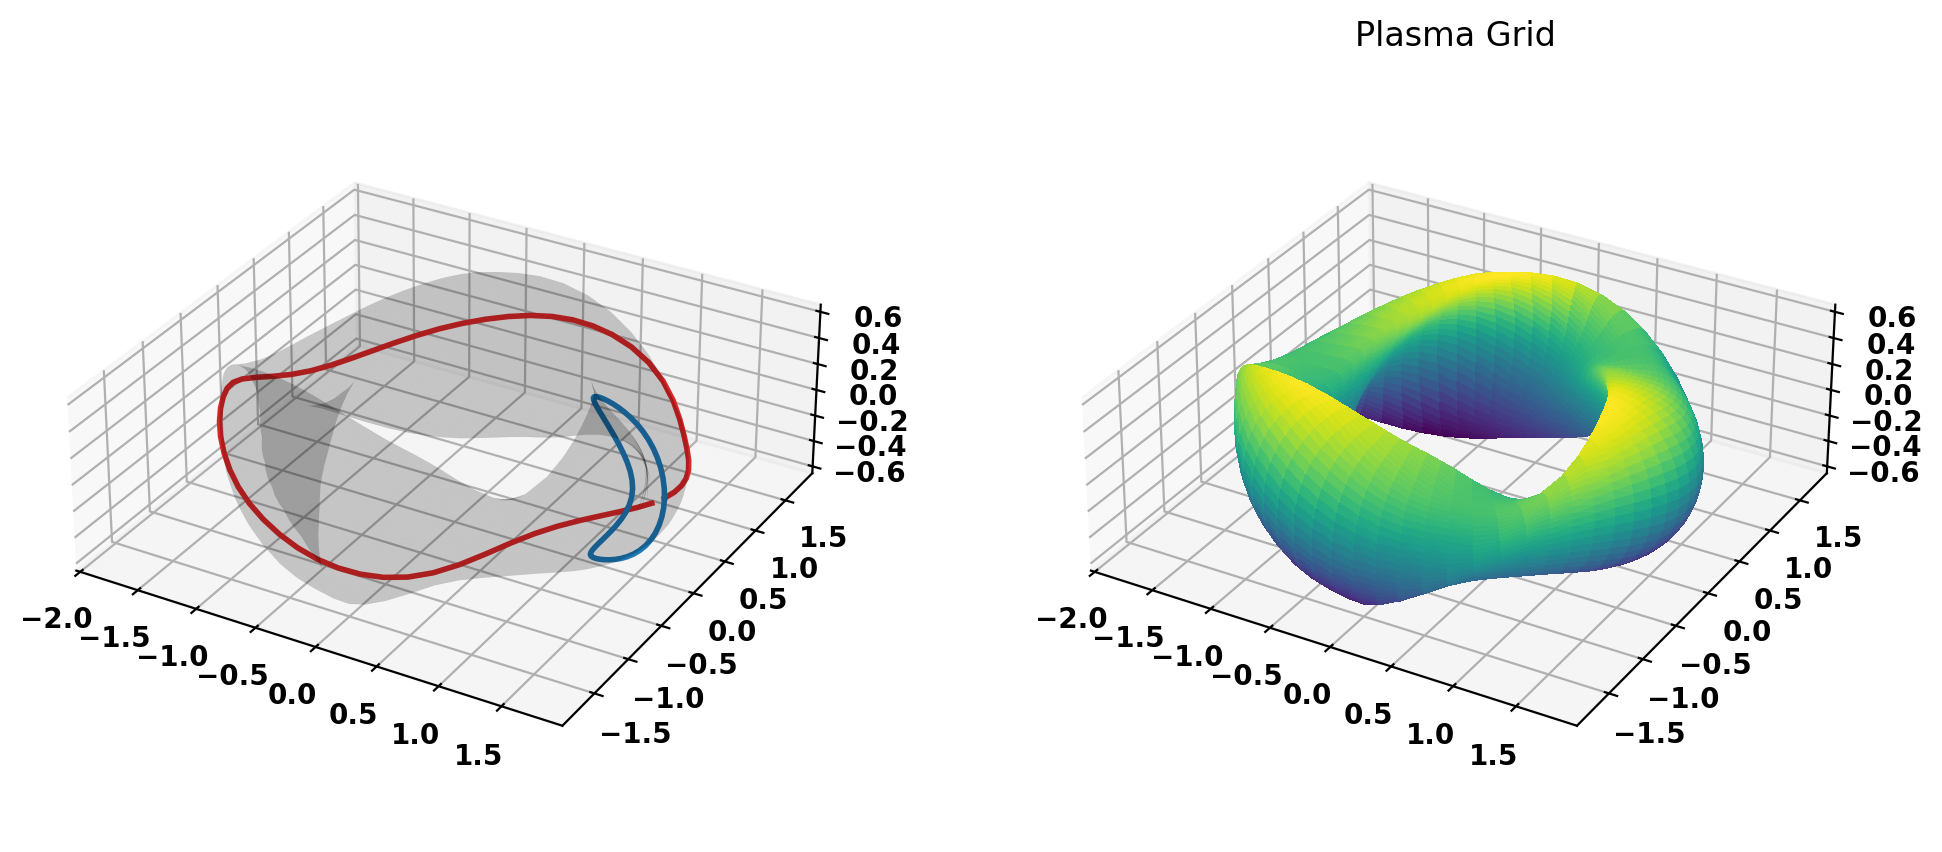

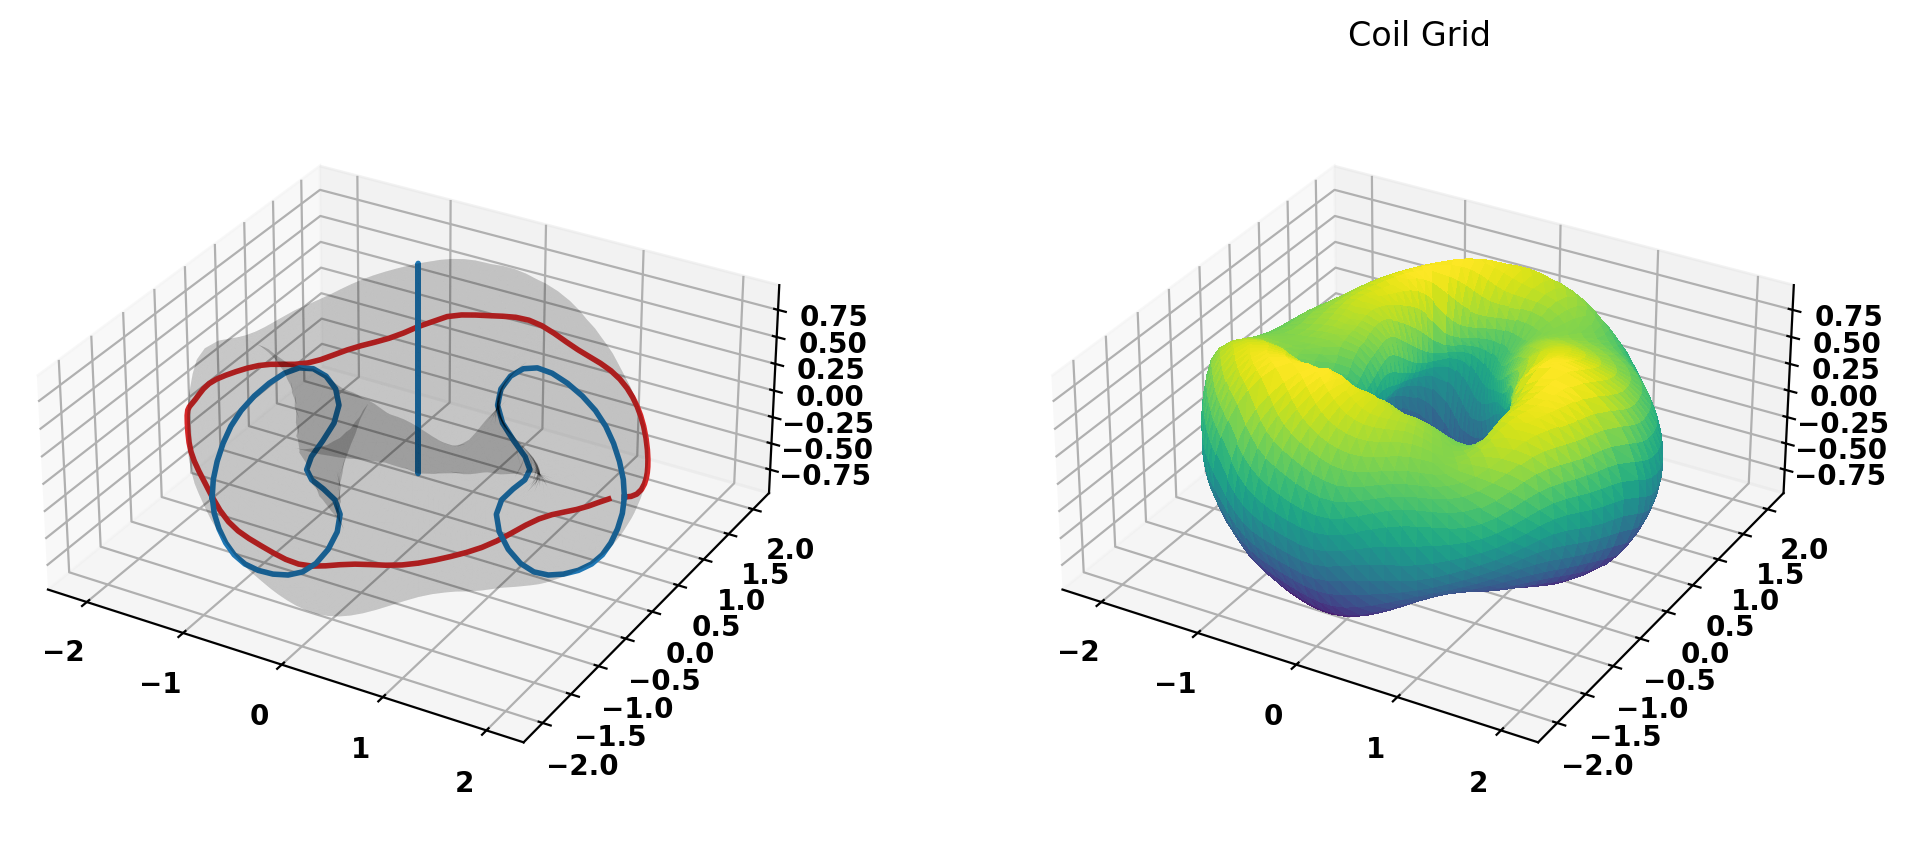

In [72]:
fig = plt.figure(figsize=(12,5))
plasma_grid.plot_mesh(fig)
plt.title('Plasma Grid')
plasma_grid.write_to_file('thincurr_plasma.h5')
fig = plt.figure(figsize=(12,5))
winding_grid.plot_mesh(fig)
plt.title('Coil Grid')
winding_grid.write_to_file('thincurr_coil.h5')

In [74]:
tw_coil = ThinCurr(myOFT)
tw_coil.setup_model(mesh_file='thincurr_coil.h5')
tw_coil.setup_io(basepath='coil')
tw_plasma = ThinCurr(myOFT)
tw_plasma.setup_model(mesh_file='thincurr_plasma.h5')
tw_plasma.setup_io(basepath='plasma')


Creating thin-wall model
 Orientation depth =       19950
  Loading V(t) driver coils
  Loading I(t) driver coils

  # of points    =         3162
  # of edges     =         9486
  # of cells     =         6324
  # of holes     =            4
  # of Vcoils    =            0
  # of closures  =            3
  # of Icoils    =            0

  Building holes

Creating thin-wall model
 Orientation depth =       19950
  Loading V(t) driver coils
  Loading I(t) driver coils

  # of points    =         3782
  # of edges     =        11346
  # of cells     =         7564
  # of holes     =            2
  # of Vcoils    =            0
  # of closures  =            1
  # of Icoils    =            0

  Building holes


In [75]:
coupling = tw_coil.cross_coupling(tw_plasma,cache_file='Lmat_coupling.save')
coupling_new = winding_grid.condense_matrix(coupling,axis=0)
winding_ndofs = coupling_new.shape[1]
del coupling

 Reading element<->element mutual inductance matrix
   Ignoring stored matrix: Model hashes do not match
 Building element<->element mutual inductance matrix
     Time = 35s          


In [76]:
reg_mat = tw_coil.get_regmat()
ncold = int(reg_mat.shape[1]/winding_surface.nfp)
reg_new = winding_grid.condense_matrix(reg_mat[:,:ncold],axis=0)
del reg_mat

In [78]:
np.shape(reg_new)

(1055, 6324)

In [ ]:
winding_surface.plot(engine="plotly", close=False)

In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


def plot_mesh_plotly(grid, equal_aspect=True, surf_alpha=0.1, surf_cmap='Viridis'):
    
    # 1. Setup the figure with two subplots
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'scene'}, {'type': 'scene'}]], # Use 'scene' for 3D plots
    )

    # --- Data Extraction (Simulated for Plotly) ---
    r = grid.r
    lc = grid.lc
    tnodeset = grid.tnodeset
    pnodesets = grid.pnodesets
    
    # --- Calculate Aspect Ratio (if needed) ---
    if equal_aspect:
        mesh_range = np.ptp(r, axis=0)
        max_range = np.max(mesh_range)
        # Plotly requires ranges for axis definition
        x_range = [np.min(r[:,0]), np.max(r[:,0])]
        y_range = [np.min(r[:,1]), np.max(r[:,1])]
        z_range = [np.min(r[:,2]), np.max(r[:,2])]
    
    # ====================================================================
    # PLOT 1: Wireframe and Boundaries (Matplotlib subplot 1,2,1)
    # ====================================================================

    # 2. Plot the main boundary (self.tnodeset) - Corresponds to ax.plot in 'tab:red'
    fig.add_trace(
        go.Scatter3d(
            x=r[tnodeset, 0], y=r[tnodeset, 1], z=r[tnodeset, 2],
            mode='lines',
            line=dict(color='red', width=4),
            name='Boundary'
        ),
        row=1, col=1
    )

    # 3. Plot the secondary boundaries (self.pnodesets) - Corresponds to ax.plot in 'tab:blue'
    for i, pnodeset in enumerate(pnodesets):
        pnodeset_tmp = np.append(pnodeset, (pnodeset[0],)) # Close the loop
        fig.add_trace(
            go.Scatter3d(
                x=r[pnodeset_tmp, 0], y=r[pnodeset_tmp, 1], z=r[pnodeset_tmp, 2],
                mode='lines',
                line=dict(color='blue', width=2),
                showlegend=(i == 0), # Only show legend once
                name='P-Node Set'
            ),
            row=1, col=1
        )

    # 4. Plot the surface mesh (black wireframe) - Corresponds to ax.plot_trisurf (black)
    fig.add_trace(
        go.Mesh3d(
            x=r[:, 0], y=r[:, 1], z=r[:, 2],
            i=lc[:, 0], j=lc[:, 1], k=lc[:, 2],
            color='black',
            opacity=surf_alpha,
            name='Surface',
            # Add wireframe outline
            contour=dict(show=True, color='gray', width=1)
        ),
        row=1, col=1
    )

    # ====================================================================
    # PLOT 2: Colored Surface Mesh (Matplotlib subplot 1,2,2)
    # ====================================================================

    # 5. Plot the surface mesh (colored by z-height) - Corresponds to ax.plot_trisurf (cmap)
    fig.add_trace(
        go.Mesh3d(
            x=r[:, 0], y=r[:, 1], z=r[:, 2],
            i=lc[:, 0], j=lc[:, 1], k=lc[:, 2],
            intensity=r[:, 2], # Color by Z-coordinate (or you could use a scalar field)
            colorscale=surf_cmap,
            showscale=False,
            name='Colored Surface'
        ),
        row=1, col=2
    )

    # 6. Apply aspect ratio correction
    if equal_aspect:
        # Plotly sets equal aspect ratio by explicitly setting the scale factor
        fig.update_scenes(
            aspectmode='data', # Use data units for aspect ratio
            # Set the entire range based on the largest dimension for true equal aspect (optional)
            xaxis=dict(range=x_range, autorange=False),
            yaxis=dict(range=y_range, autorange=False),
            zaxis=dict(range=z_range, autorange=False),
            # Set the aspect ratio manually
            aspectratio=dict(x=mesh_range[0]/max_range, y=mesh_range[1]/max_range, z=mesh_range[2]/max_range)
        )
    
    # 7. Final layout adjustments (optional)
    fig.update_layout(
        title_text="Mesh Visualization (Plotly)",
        height=700,
        showlegend=True
    )
    
    return fig

plot_mesh_plotly(winding_grid)

In [127]:
def build_regcoil_grid(filename, field_suffix, ntheta, nphi, full_torus=False):
    r'''! Build a uniform grid from a REGCOIL definition

    @param field_suffix Suffix for netCDF fields (eg. "plasma" or "coil")
    @param ntheta Number of points in the \f$ \theta \f$ (poloidal) direction
    @param nphi Number of points (per field period) in the \f$ \phi \f$ (toroidal) direction
    @param full_torus Construct grid for the full torus (default: one field period)
    @result `rgrid` Structed phi-theta grid of points [nphi,ntheta,3], `nfp` Number of field periods
    '''
    import netCDF4
    with netCDF4.Dataset(filename) as file:
        rmnc = file['rmnc_{0}'.format(field_suffix)][:]
        zmns = file['zmns_{0}'.format(field_suffix)][:],
        xm = file['xm_{0}'.format(field_suffix)][:]
        xn = file['xn_{0}'.format(field_suffix)][:]
        nfp = file['nfp'][0]
        if full_torus:
            nphi *= nfp
            nfp = 1
    #
    theta_span = np.linspace(0.0,2.0*np.pi,ntheta,endpoint=False)
    zeta_span = np.linspace(0.0,2.0*np.pi/nfp,nphi,endpoint=(nfp>1))
    rgrid = np.zeros((zeta_span.shape[0],theta_span.shape[0],3))
    print(np.shape(rmnc), np.shape(xm), np.shape(theta_span))
    for j in range(zeta_span.shape[0]):
        for i in range(theta_span.shape[0]):
            r = np.sum(rmnc*np.cos(xm*theta_span[i] - xn*zeta_span[j]))
            z = np.sum(zmns*np.sin(xm*theta_span[i] - xn*zeta_span[j]))
            rgrid[j,i,:] = [r*np.cos(zeta_span[j]), r*np.sin(zeta_span[j]), z]
    return rgrid, nfp

coil_grid, nfp = build_regcoil_grid('regcoil_out.li383.nc','coil',ntheta,nphi,full_torus=False)

(221,) (221,) (32,)


# W/O Simsopt version

In [2]:
data_dict = jnp.load('li383_minimum_example.npy', allow_pickle=True).item()
winding_surface = data_dict['winding_surface']
plasma_surface = data_dict['plasma_surface']
net_poloidal_current_amperes = data_dict['net_poloidal_current_amperes']
plasma_coil_distance = data_dict['plasma_coil_distance']
net_poloidal_current_amperes = 11884578.094260072
mpol = 4
ntor = 4
# jax.config.update('jax_enable_x64', True)


In [14]:
# Then, test with REGCOIL, given winding surface.
print('Testing REGCOIL, with known winding surface')
regcoil2_out_dict, regcoil2_qp, regcoil2_dofs, status = quadcoil(
    nfp=plasma_surface.nfp,
    stellsym=plasma_surface.stellsym,
    mpol=mpol,
    ntor=ntor,
    plasma_dofs=plasma_surface.get_dofs(),
    plasma_mpol=plasma_surface.mpol,
    plasma_ntor=plasma_surface.ntor,
    net_poloidal_current_amperes=net_poloidal_current_amperes,
    net_toroidal_current_amperes=0.,
    winding_dofs=winding_surface.get_dofs(),
    winding_mpol=winding_surface.mpol,
    winding_ntor=winding_surface.ntor,
    winding_quadpoints_phi=winding_surface.quadpoints_phi,
    winding_quadpoints_theta=winding_surface.quadpoints_theta,
    objective_name=('f_B', 'f_K'),
    objective_weight=np.array([1., 0.01]),
    objective_unit=(1., 1.),
    metric_name=('f_B', 'f_K'),
    verbose=2
)

Testing REGCOIL, with known winding surface


NameError: name 'winding_surface' is not defined

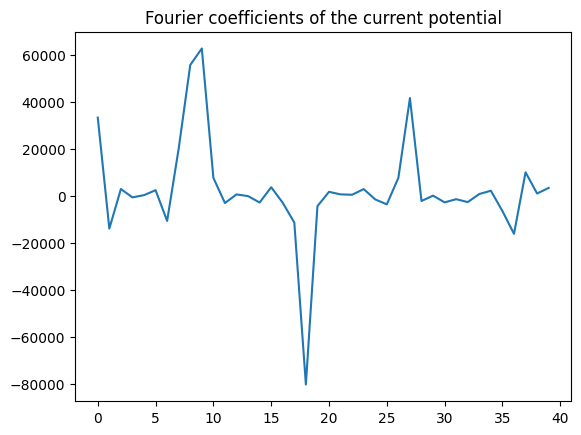

In [4]:
regcoil2_phi_mn = regcoil2_dofs['phi']
plt.title('Fourier coefficients of the current potential')
plt.plot(regcoil2_phi_mn, label='REGCOIL sln (from QUADCOIL)')